In [21]:
import pandas as pd
data = pd.read_csv('/content/all_data.csv')

In [22]:
import numpy as np
data['hour_sin'] = np.sin(2 * np.pi * data['hour'] / 24)
data['hour_cos'] = np.cos(2 * np.pi * data['hour'] / 24)

In [23]:
data.head()

,Unnamed: 0.1,date,pizza,burger,sushi,pasta,salad,steak,tacos,sandwich,...,salt,pepper,olive oil,vinegar,total,hour,is_holiday,Unnamed: 0,hour_sin,hour_cos
0,0,2024-10-30 15:00:00,35,11,10,14,31,28,18,27,...,48,61,19,31,1966,15,0,NaN,-0.707107,-7.071068e-01
1,1,2024-10-30 16:00:00,40,12,12,16,36,32,21,28,...,49,68,21,33,2149,16,0,NaN,-0.866025,-5.000000e-01
2,2,2024-10-30 17:00:00,45,13,13,17,35,35,24,28,...,50,72,20,35,2212,17,0,NaN,-0.965926,-2.588190e-01
3,3,2024-10-30 18:00:00,45,14,13,15,35,37,25,26,...,51,74,20,33,2233,18,0,NaN,-1.000000,-1.836970e-16
4,4,2024-10-30 19:00:00,43,13,12,15,36,77,24,29,...,54,72,23,33,2279,19,0,NaN,-0.965926,2.588190e-01


In [24]:
data=data.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)

In [25]:
import tensorflow as tf
x = data[['hour_sin', 'hour_cos', 'is_holiday']]
y = data['total']

In [26]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [27]:
model=Sequential()
model.add(LSTM(128,return_sequences=True,input_shape=(x.shape[1],1)))
model.add(LSTM(64,return_sequences=True))
model.add(LSTM(32))
model.add(Dense(25))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 3, 128)              │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 3, 64)               │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 25)                  │             825 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 129,235 (504.82 KB)

 Trainable params: 129,235 (504.82 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.fit(x, y, batch_size=32, epochs=200)

Epoch 1/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 4341518.5000
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4408340.0000
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4366219.0000
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4212212.0000
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4246036.0000
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4138985.7500
Epoch 7/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4044214.5000
Epoch 8/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4094288.5000
Epoch 9/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4183161.5000
Epoch 10/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4032196.2500
Epoch 11/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3853325.5000
Epoch 12/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3880934.0000
Epoch 13/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4052377.7500
Epoch 14/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms

In [29]:
import matplotlib.pyplot as plt

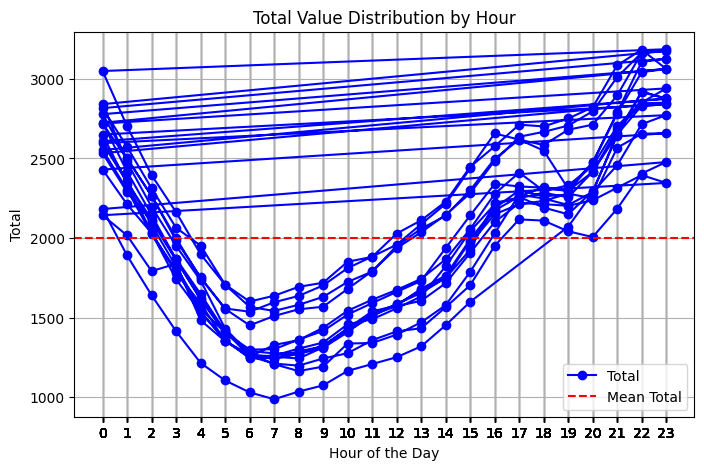

In [30]:
plt.figure(figsize=(8, 5))
plt.plot(data['hour'], data['total'], marker='o', color='blue', label='Total')
plt.title('Total Value Distribution by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Total')
plt.axhline(y=data['total'].mean(), color='red', linestyle='--', label='Mean Total')
plt.legend()
plt.grid()
plt.xticks(data['hour'])
plt.show()

In [31]:
predictions = model.predict(x)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


In [32]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(data['total'], predictions)**.5
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 222.95105526045177


In [33]:
print(model.predict(np.array([[0, -0.707107, -7.071068e-01]])))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[1565.4895]]


In [34]:
predictions

array([[1859.6068],
       [2046.3451],
       [2205.0227],
       [2308.7817],
       [2374.5195],
       [2402.546 ],
       [2420.097 ],
       [2429.5315],
       [2426.2905],
       [2408.133 ],
       [2336.916 ],
       [2089.514 ],
       [1787.7544],
       [1510.3363],
       [1341.5093],
       [1262.3761],
       [1240.4274],
       [1258.722 ],
       [1307.541 ],
       [1385.8309],
       [1486.9404],
       [1565.7592],
       [1620.819 ],
       [1707.5566],
       [1859.6068],
       [2046.3451],
       [2205.0227],
       [2308.7817],
       [2374.5195],
       [2402.546 ],
       [2420.097 ],
       [2429.5315],
       [2426.2905],
       [2408.133 ],
       [2336.916 ],
       [2089.514 ],
       [1787.7544],
       [1510.3363],
       [1341.5093],
       [1262.3761],
       [1240.4274],
       [1258.722 ],
       [1307.541 ],
       [1385.8309],
       [1486.9404],
       [1565.7592],
       [1620.819 ],
       [1707.5566],
       [1859.6068],
       [2046.3451],
